--- Dataset Head ---
   Unnamed: 0                            Property_Name  \
0           0                         Casagrand ECR 14   
1           1    Ramanathan Nagar, Pozhichalur,Chennai   
2           2                              DAC Prapthi   
3           3  Naveenilaya,Chepauk, Triplicane,Chennai   
4           4                           DRA 90 Degrees   

                                      Property Title       Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  19900000.0   
1  10 BHK Independent House for sale in Pozhichal...  22500000.0   
2      3 BHK Flat for sale in West Tambaram, Chennai  10000000.0   
3  7 BHK Independent House for sale in Triplicane...  33300000.0   
4       3 BHK Flat for sale in Pallikaranai, Chennai  13000000.0   

                                   Location  Total_Area(SQFT)  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai              2583     7704.219899   
1     Ramanathan Nagar, Pozhichalur,Chennai              70

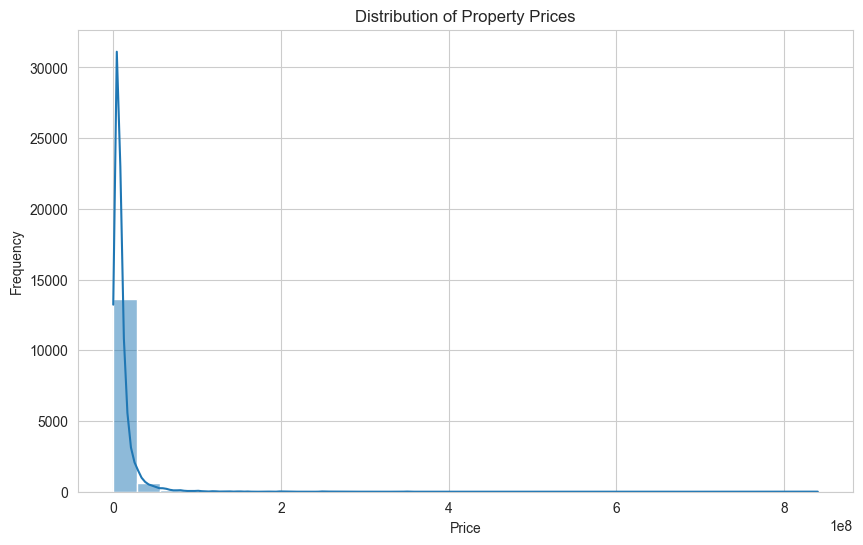

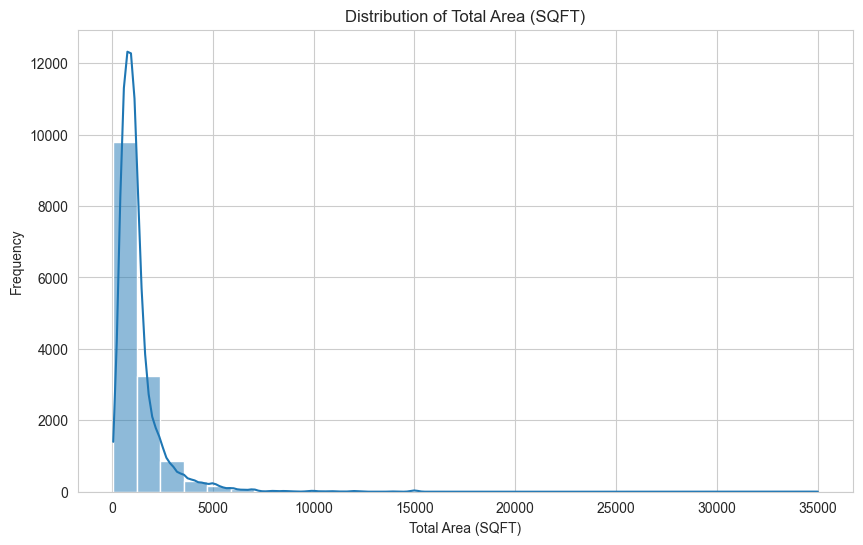

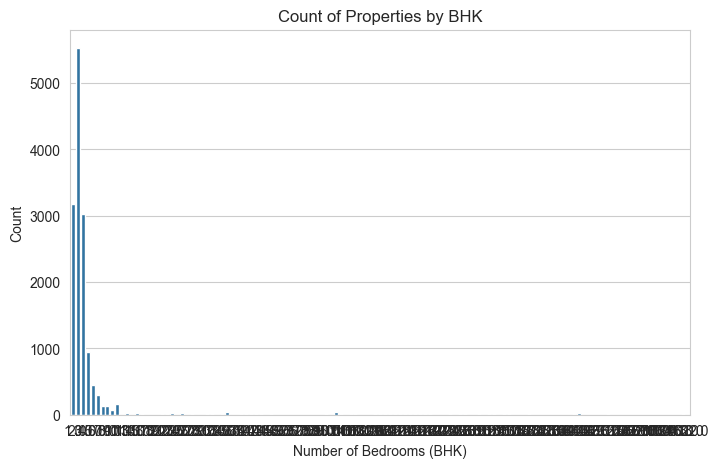

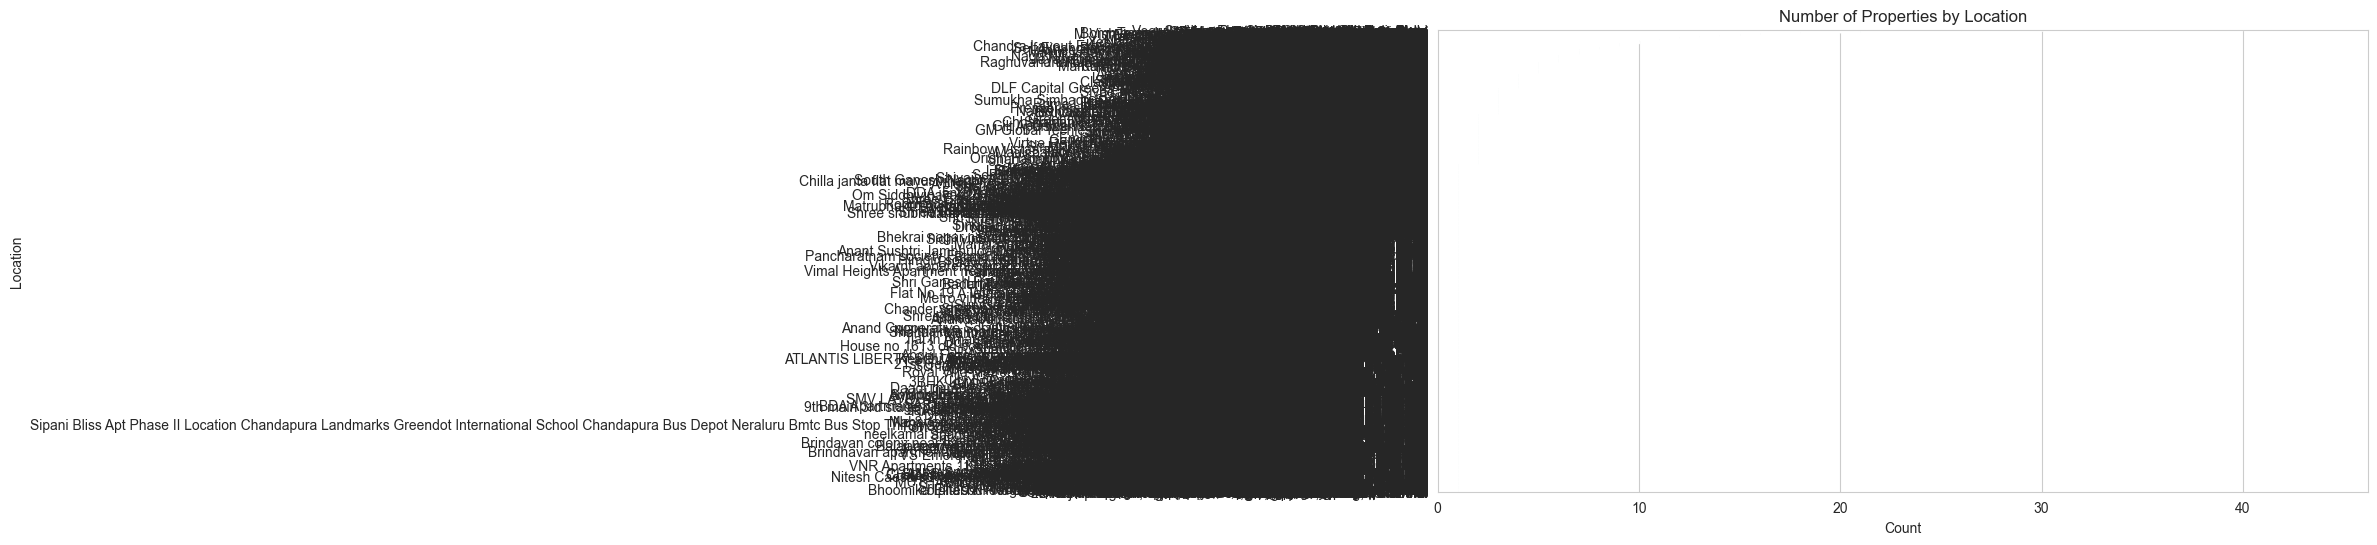

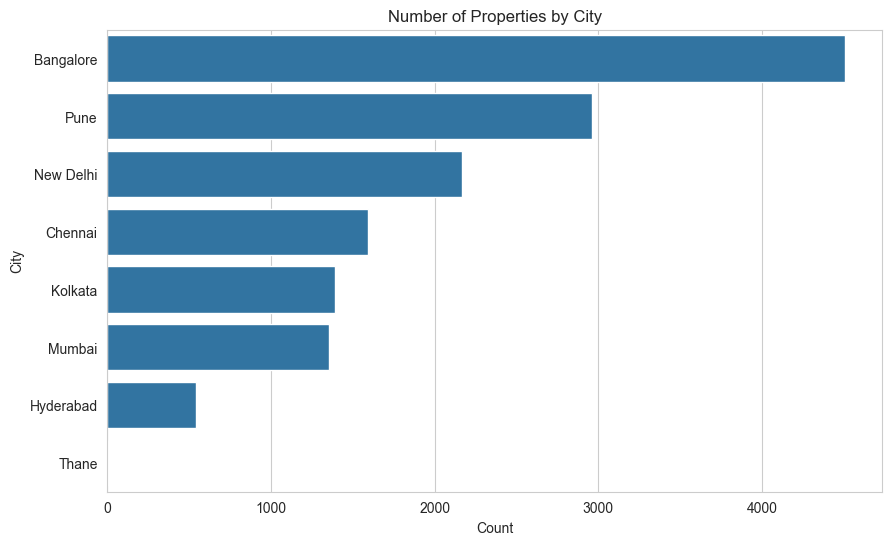

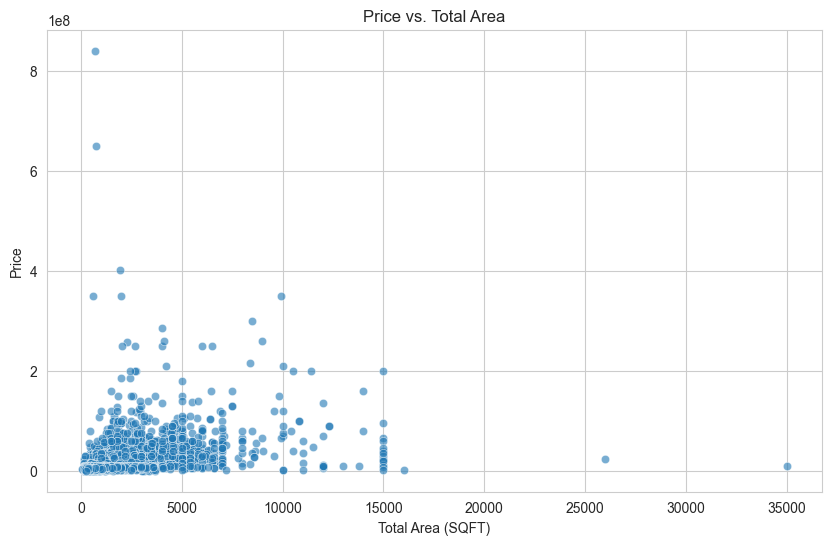

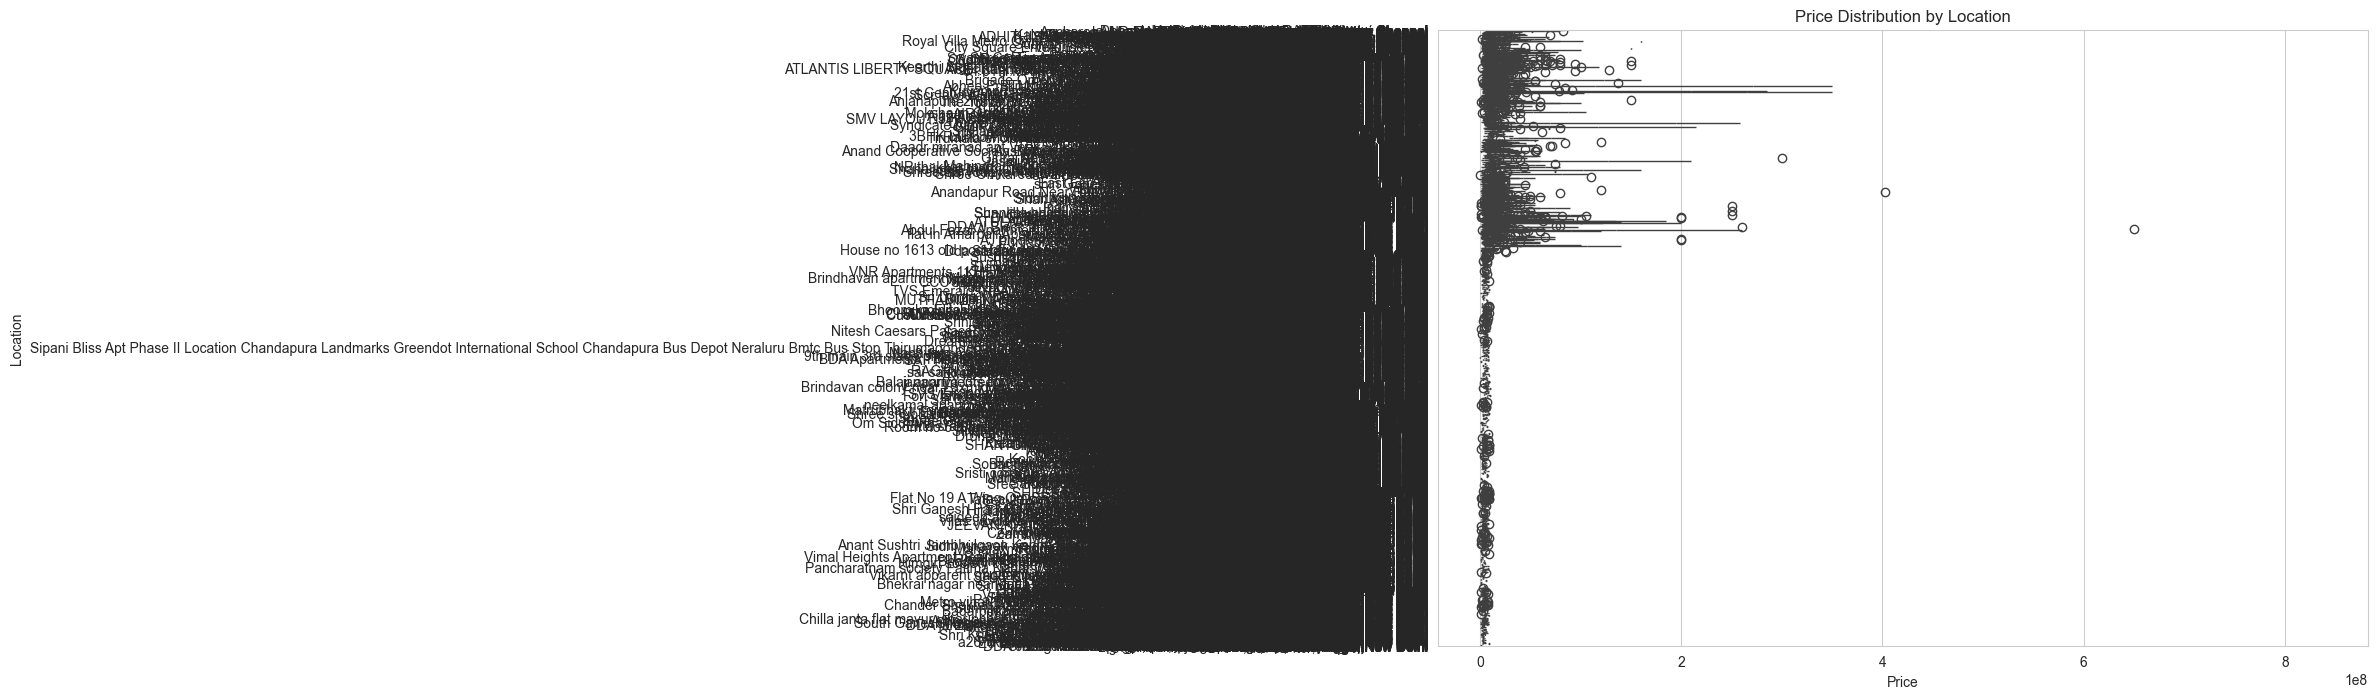

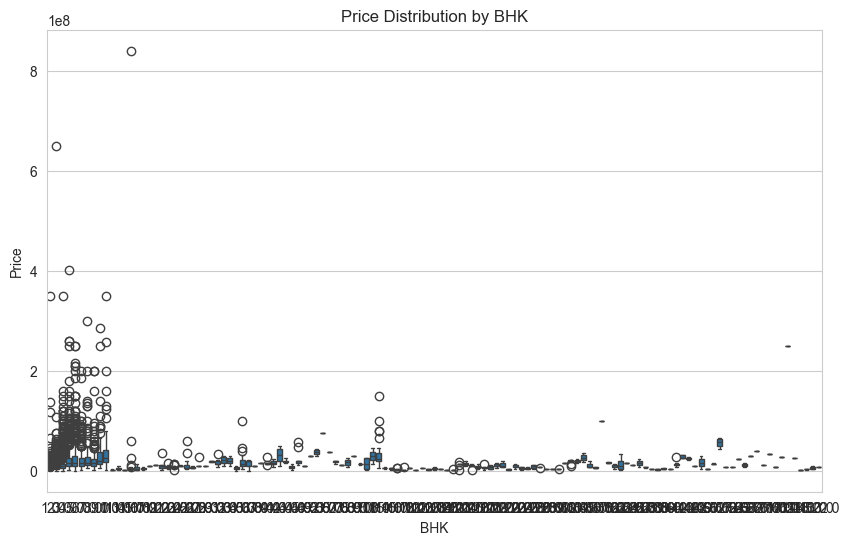

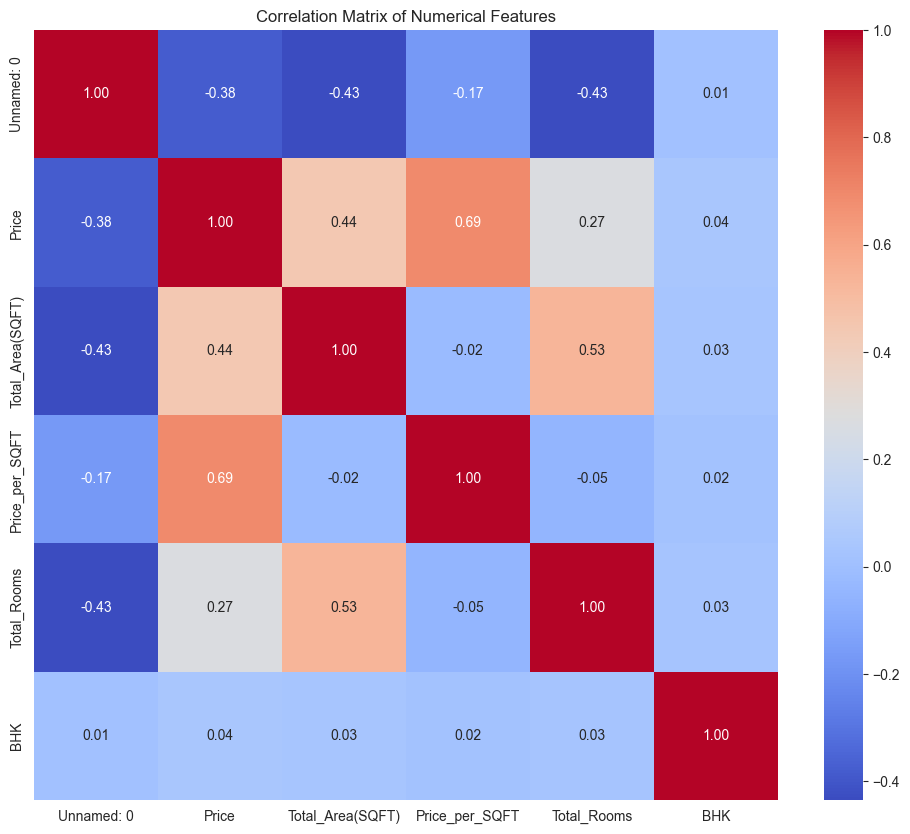

In [3]:
# House Price Prediction: Exploratory Data Analysis (EDA)

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/Indian_Real_Estate_Clean_Data.csv")

df['Price_per_SQFT'] = df['Price'] / df['Total_Area(SQFT)']
df['Description'] = 'A beautiful property.'


# --- 1. Basic Information ---
print("--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Statistical Summary ---")
print(df.describe())
print("\n--- Missing Values ---")
print(df.isnull().sum())


# --- 2. Univariate Analysis (Visualizing single variables) ---

# Set plot style
sns.set_style("whitegrid")

# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], kde=True, bins=30)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Total Area Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Total_Area(SQFT)"], kde=True, bins=30)
plt.title("Distribution of Total Area (SQFT)")
plt.xlabel("Total Area (SQFT)")
plt.ylabel("Frequency")
plt.show()

# BHK Count
plt.figure(figsize=(8, 5))
sns.countplot(x="BHK", data=df)
plt.title("Count of Properties by BHK")
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Count")
plt.show()

# Location Count
plt.figure(figsize=(12, 6))
sns.countplot(y="Location", data=df, order=df["Location"].value_counts().index)
plt.title("Number of Properties by Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

# City Count
plt.figure(figsize=(10, 6))
sns.countplot(y="city", data=df, order=df["city"].value_counts().index)
plt.title("Number of Properties by City")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()


# --- 3. Bivariate Analysis (Visualizing relationships between two variables) ---

# Price vs. Total Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Total_Area(SQFT)", y="Price", data=df, alpha=0.6)
plt.title("Price vs. Total Area")
plt.xlabel("Total Area (SQFT)")
plt.ylabel("Price")
plt.show()

# Price vs. Location
plt.figure(figsize=(12, 8))
sns.boxplot(x="Price", y="Location", data=df)
plt.title("Price Distribution by Location")
plt.xlabel("Price")
plt.ylabel("Location")
plt.show()

# Price vs. BHK
plt.figure(figsize=(10, 6))
sns.boxplot(x="BHK", y="Price", data=df)
plt.title("Price Distribution by BHK")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()


# --- 4. Multivariate Analysis ---

# Correlation Heatmap
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Pairplot to see relationships between all numeric variables
# sns.pairplot(df.select_dtypes(include=np.number))
# plt.suptitle('Pairplot of Numerical Features', y=1.02)
# plt.show()


# --- 5. Initial Findings & Next Steps ---
# - The price is positively correlated with Total_Area, Total_Rooms, and BHK.
# - Location and city seem to be a significant factor in determining the price.
# - The dataset appears clean with no immediate missing values, but in a real-world scenario, we'd need to handle them.
# - Categorical features like 'Location', 'city', and 'property_type' will need to be encoded for the models.